# Homework 2
### Seema Vora

Sources used:
1. https://dataaspirant.com/k-nearest-neighbor-classifier-intro/ 
2. https://www.linkedin.com/pulse/k-nearest-neighbors-knn-algorithm-python-from-using-pre-build-mahato 


In [682]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from math import sqrt
import collections

In [683]:
np.random.seed(55)


## STEP 1: 2D Data Generation 



Defining Class 0 and Class 1


In [684]:
n = 100 #100 synthetic samples -> with assigned distributions

classes_2D = 2

# Class 0
X1 = np.random.normal(loc=-2.0, scale=2.0, size=int(n/classes_2D))
Y1 = np.random.normal(loc=0.0, scale=1.0, size=int(n/classes_2D))
l1 = [0]*int(n/classes_2D)

# Class 1
X2 = np.random.normal(loc=2.0, scale=2.0, size=int(n/classes_2D))
Y2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/classes_2D))
l2 = [1]*int(n/classes_2D)


In [685]:
# Merge data sets
X_2d = np.concatenate((X1,X2), axis=0)
Y_2d = np.concatenate((Y1,Y2), axis=0)
labels_2d = l1+l2
print(labels_2d)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


##Step 2 3D Data Generation

Defining Class 0-3

In [686]:
n = 1000 #data points
classes_3D = 3

# Class 0
X1 = np.random.normal(loc=0.0, scale=3.0, size=int(n/classes_3D))
Y1 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/classes_3D))
Z1 = np.random.normal(loc=-1.0, scale=1.0, size=int(n/classes_3D))
l1 = [0]*int(n/classes_3D)

# Class 1
X2 = np.random.normal(loc=2, scale=2.0, size=int(n/classes_3D))
Y2 = np.random.normal(loc=0.0, scale=1.0, size=int(n/classes_3D))
Z2 = np.random.normal(loc=1.0, scale=1.0, size=int(n/classes_3D))
l2 = [1]*int(n/classes_3D)

# Class 2
X3 = np.random.normal(loc=0.0, scale=3.0, size=int(n/classes_3D))
Y3 = np.random.normal(loc=3.0, scale=1.0, size=int(n/classes_3D))
Z3 = np.random.normal(loc=4.0, scale=1.0, size=int(n/classes_3D))
l3 = [2]*int(n/classes_3D)

# Class 3
X4 = np.random.normal(loc=0.0, scale=3.0, size=int(n/classes_3D))
Y4 = np.random.normal(loc=5.0, scale=3.0, size=int(n/classes_3D))
Z4 = np.random.normal(loc=-3.0, scale=1.0, size=int(n/classes_3D))
l4 = [3]*int(n/classes_3D)


In [687]:
# Merge data sets
X_3d = np.concatenate((X1,X2, X3, X4), axis=0)
Y_3d = np.concatenate((Y1,Y2, Y3, Y4), axis=0)
Z_3d = np.concatenate((Z1, Z2, Z3, Z4), axis=0)
labels_3d = l1+l2+l3+l4
print(labels_3d)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Visualizing the DataFrames for 2D Data

In [688]:
# dt = pd.DataFrame({'X':X, 'Y':Y, 'Labels':labels}, columns=['X', 'Y','Labels'])
dt = pd.DataFrame({'X':X_2d, 'Y':Y_2d}, columns=['X', 'Y'])
dt.head() 

,X,Y
0,-5.247462,-0.567562
1,-2.203568,-1.004690
2,-5.619582,0.197138
3,-1.474692,0.726756
4,-1.480095,0.275635


### Visualizing the DataFrames for 3D Data

In [689]:
dt_3D = pd.DataFrame({'X':X_3d, 'Y':Y_3d,'Z': Z_3d}, columns=['X', 'Y', 'Z'])
dt_3D.head() 

,X,Y,Z
0,-0.189764,-3.184603,-1.018221
1,1.399980,-3.983592,-1.756491
2,-1.189915,-2.081255,-2.132643
3,1.710470,-4.648612,-1.452466
4,0.248690,-2.124924,1.068828


## Step 2: Separate this synthetic dataset into training and test sets at 80/20 ratio

In [690]:
X_train, X_test, Y_train, Y_test = train_test_split(dt,labels_2d, test_size=0.2, random_state=0)

X_train_set = pd.DataFrame(X_train)
X_train_set['labels'] = Y_train
X_train_dataset = X_train_set.to_numpy()

X_test_set = pd.DataFrame(X_test)
X_test_set['labels'] = Y_test
X_test_dataset = X_test_set.to_numpy()

In [691]:
X_train_3d, X_test_3d, Y_train_3d, Y_test_3d = train_test_split(dt_3D,labels_3d, test_size=0.2, random_state=0)

X_train_set_3d = pd.DataFrame(X_train_3d)
X_train_set_3d['labels'] = Y_train_3d
X_train_dataset_3d = X_train_set_3d.to_numpy()

X_test_set_3d = pd.DataFrame(X_test_3d)
X_test_set_3d['labels'] = Y_test_3d
X_test_dataset_3d = X_test_set_3d.to_numpy()

In [692]:
# dataset = dt.to_numpy()

## Step 3: Building the KNN Function

In [693]:

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	dataset = dt.to_numpy()
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [694]:
row0 = dataset[0]
for row in dataset:
	distance = euclidean_distance(row0, row)
	# print(distance)

In [695]:
# Locate the most similar neighbors
def knn(newObservation, referenceData, k):
	distances = list()
	for _,newObservation_row in newObservation.iterrows():
		dist = euclidean_distance(referenceData, newObservation_row)
		distances.append((newObservation_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(k):
		neighbors.append(distances[i][0])
	return neighbors             






In [696]:
#2D Implementation
neighbors = knn(X_train_set, X_test.iloc[0], 3)

In [697]:
#3D Implementation
neighbors_3d = knn(X_train_set_3d, X_test_3d.iloc[0], 3)

## Step 4: Accuracy Calculation

In [698]:
#Accuracy calculation function

def calcAccuracy(actual, predicted):
    temp = 0
    for i in range(len(actual)):
        if(actual.iloc[i]['labels'] == predicted[i]):
            temp += 1
    return (temp/float(len(actual)))*100.00

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction


### Calculating 2D Accuracy

In [699]:
pred_2d = []
for i in range(len(X_test)):
    # temp = predict_classification(X_train_set, X_test.iloc[i], 3)
    temp = predict_classification(X_train, X_test.iloc[i], 3)
    pred_2d.append(temp)

accuracy= calcAccuracy(X_test_set, pred_2d)
print('Accuracy of the 2D Model',accuracy)



Accuracy of the 2D Model 80.0


### Calculating 3D Accuracy

In [700]:

pred3 = []
for i in range(len(X_test_3d)):
    temp = predict_classification(X_train_3d, X_test_3d.iloc[i], 3)
    pred3.append(temp)

accuracy = calcAccuracy(X_test_set_3d, pred3)
print('Accuracy of the 3D Model',accuracy )

Accuracy of the 3D Model 94.7565543071161


## Step 5: Graphing the Results

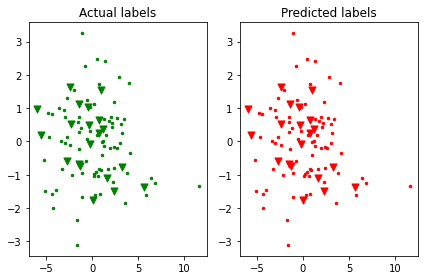

In [701]:
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c='green', marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c='green', marker="v")
plt.title("Actual labels")

plt.subplot(1, 2, 2)
plt.scatter(X_train.iloc[:,0],X_train.iloc[:,1], s=25, c='red', marker=".")
plt.scatter(X_test.iloc[:,0],X_test.iloc[:,1], s=50, c='red', marker="v")
plt.title("Predicted labels")

plt.tight_layout()
plt.show()